In [1]:
import java.io.File
import javax.imageio.ImageIO

val showImages = false
fun show(name: String) {
    if (showImages) DISPLAY(ImageIO.read(File("../images/$name")))
}

In [2]:
show("ForestWalkIntro.jpg")

# Overview

Why this topic? Why this tool?

# Detour

Forest Walks take a detour. I can write, I can have images, I can code but can I draw?

In [3]:
show("detour.jpg")


# Benoît and the Beast


In [4]:
show("BenoitAndBeast.jpg")

### Self Similar

  ![Mandelbrot](https://upload.wikimedia.org/wikipedia/commons/thumb/2/21/Mandel_zoom_00_mandelbrot_set.jpg/480px-Mandel_zoom_00_mandelbrot_set.jpg) 
  
  ![Mandelbrot seahorse valley](https://upload.wikimedia.org/wikipedia/commons/thumb/e/ee/Mandel_zoom_01_head_and_shoulder.jpg/480px-Mandel_zoom_01_head_and_shoulder.jpg)
  
  ![Mandelbrot seahorse antenna](https://upload.wikimedia.org/wikipedia/commons/thumb/f/fc/Mandel_zoom_08_satellite_antenna.jpg/480px-Mandel_zoom_08_satellite_antenna.jpg)
   

### Simple Construction

In [5]:
%use lib-ext(0.12.0-93)
LATEX(
    """
\Huge
z_{n+1} = z_n^2 + c
"""
)

🪨 a complex number c is a member of the [Mandelbrot](https://en.wikipedia.org/wiki/Mandelbrot_set#cite_note-13) set if, when starting with z0 = 0 and applying the iteration repeatedly, the absolute value of zn remains bounded for all n>0

### Surface complexity - dimension


# Aristid Lindenmayer



In [6]:
show("AristidPlantDictionary.jpg")

In [7]:
import net.maiatoday.forestwalk.lsystem.plant

val p = plant {
    seed = "🪨"
    rules = mapOf(
        "🪨" to "🪨🌱",
        "🌱🌱🌱🌱" to "🌲🌱🪨🪨",
        "🌱🌲🌱" to "🌳",
        "🪨🪨🪨" to "🐿️"
    )
     grow(13)
   // sprout(13, listOf(1.0, 1.0, 1.0, 0.5))
}
p.bluePrint

🪨🌱🌱🌱🌳🪨🌲🌱🐿️🌲🌱🪨🪨🌳🪨🌲🌱🪨🪨🌳🐿️🌲🌱🪨🌳🐿️🌲🌱🪨🌱🪨🌱

In [8]:
show("TurtleTerrapinTortoise.jpg")

 ---

## Turtle Tortoise Terrapin
Turtles [vs](https://www.diffen.com/difference/Tortoise_vs_Turtle) Tortoises [vs](https://africageographic.com/stories/whats-the-difference-between-turtles-tortoises-and-terrapins/) Terrapins

[Terrapin-Turtle](https://cyberneticzoo.com/cyberneticanimals/1969-the-logo-turtle-seymour-papert-marvin-minsky-et-al-american/)


### The code

| Character     | Action                                                       |
|---------------|--------------------------------------------------------------|
| `F`           | `pen down move forward`                                      |
| `f`           | `move forward`                                               |
| `+`           | `rotate by the angle clockwise`                              |
| `-`           | `rotate by the angle anti-clockwise`                         |
| `[`           | `remember the state (position, angle and more) on the stack` |
| `]`           | `take the most recent state from the stack and use it `      |
| `             | `use the next pen colour`                                    |
| anything else | is ignored                                                   |


### The *Koch* curve

Seed = `F+F+F+F`
Rules = `F -> F+F-F-FF+F+F-F`
Angle = 90


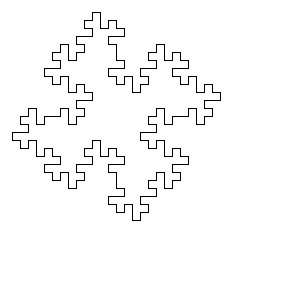

In [9]:
import net.maiatoday.forestwalk.lsystem.goTortoise
import net.maiatoday.forestwalk.lsystem.plant
import net.maiatoday.forestwalk.tools.canvas
import java.awt.Color

val koch = plant {
    seed = "F+F+F+F"
    rules = mapOf(
        "F" to "F+F-F-FF+F+F-F"
    )
    grow(2)
}

canvas { width, _ ->
    goTortoise(
        startX = (width*0.6).toInt(),
        startY = (width*0.6).toInt(),
        angleChangeDeg = 90.0,
        length = width/35,
        bluePrint = koch.bluePrint,
    )
}

### Some other examples

| Seed  | Rules                              | Angle | Iterations | Notes                     | Template |
|-------|------------------------------------|-------|------------|---------------------------|----------|
| `F`   | `F to F[+F]F[-F]F`                 | 25.7  | 5          | Long thin weed            | weed     |
| `F`   | `F to F[+F]F[-F][F]`               | 20    | 5          | lots of straight branches |          |
| `F`   | `F to FF-[-F+F+F]+[+F-F-F]`        | 22.5  | 4          | I like this one           | plant    |
| `X`   | `X to F[+X]F[-X]+X, F to FF`       | 20    | 7          |                           |          |
| `X`   | `X to F[+X][-X]FX, F to FF`        | 25.7  | 7          | Sort of Xmas tree         | xmas     |
| `X`   | `X to F-[[X]+X]+F[+FX]-X, F to FF` | 22.5  | 5          |                           |          |
| `-X`  | `X to F[-X][X]F[-X]+FX, F to FF`   | 25    | 5          | The wikipedia one         | wiki     |


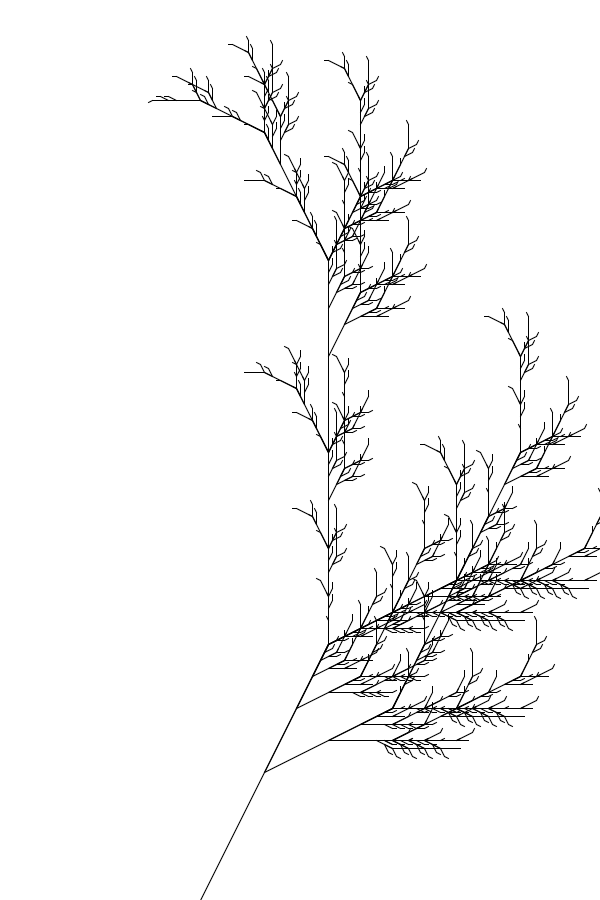

In [10]:
import net.maiatoday.forestwalk.lsystem.goTortoise
import net.maiatoday.forestwalk.lsystem.plant
import net.maiatoday.forestwalk.tools.canvas
import java.awt.Color

val p = plant {
    seed = "-X"
    rules = mapOf(
        "X" to "F[-X][X]F[-X]+FX",
        "F" to "FF"
    )
    grow(6)
}

canvas(600, 900) { width, height ->
    goTortoise(
        startX = width / 3,
        startY = height,
        angleChangeDeg = 25.0,
        length = 3,
        bluePrint = p.bluePrint
    )
}

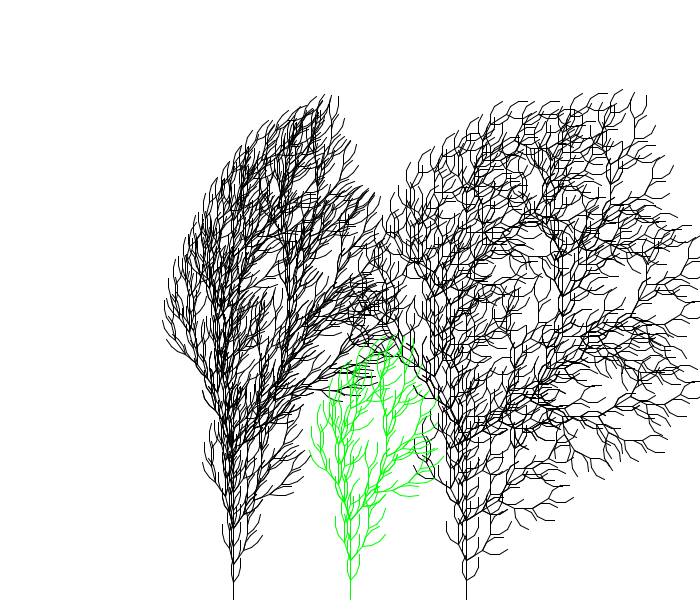

In [11]:
import net.maiatoday.forestwalk.lsystem.goTortoise
import net.maiatoday.forestwalk.lsystem.plant
import net.maiatoday.forestwalk.tools.*
import java.awt.Color

val p1 = plant {
    seed = "F"
    rules = mapOf(
        "F" to "FF-[-F+F+F]+[+F-F-F]"
    )
    grow(4)
}

val p2 = plant {
    seed = "F"
    rules = mapOf(
        "F" to "FF-[-F+F+F]+[+F-F-F]"
    )
    sprout(4, listOf(0.9))
}

canvas(700, 600) { width, height ->

    goTortoise(
        startX = width / 3,
        startY = height,
        angleChangeDeg = 17.0,
        length = 9,
        bluePrint = p1.bluePrint
    )
    goTortoise(
        startX = 2 * width / 3,
        startY = height,
        angleChangeDeg = 29.0,
        length = 10,
        bluePrint = p1.bluePrint
    )
    goTortoise(
        startX = width / 2,
        startY = height,
        angleChangeDeg = 20.0,
        length = 10,
        bluePrint = p2.bluePrint,
        penColors = listOf(Color.GREEN)
    )
}


## Stochastic Squirrel

[involving a random variable](https://www.merriam-webster.com/dictionary/stochastic#:~:text=%CB%88kas%2Dtik%20st%C5%8D%2D-,1,%3A%20involving%20chance%20or%20probability)


In [12]:
show("StochasticSquirrel.jpg")

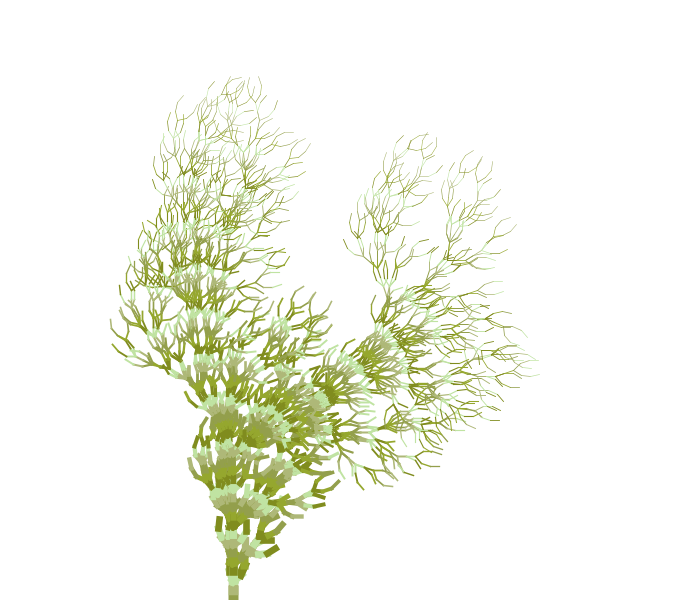

In [13]:
import net.maiatoday.forestwalk.lsystem.goSquirrel

val p = plant {
    seed = "F"
    rules = mapOf(
        "F" to "FF-[-F+F+F]+[+F-F-F]"
    )
    grow(4)
}

canvas(700, 600) { width, height ->
    goSquirrel(
        startX = width / 3,
        startY = height,
        angleChangeDeg = 25.0,
        startStroke = 10.0f,
        strokeChange = 0.95f,
        length = 10,
        bluePrint = p.bluePrint,
        penColors = shrubShades
    )
}


 ### In search of the perfect tree

| Seed  | Rules                              | Angle | Iterations | Notes                     | Template |
|-------|------------------------------------|-------|------------|---------------------------|----------|
| `F`   | `F to F[+F]F[-F]F`                 | 25.7  | 5          | Long thin weed            | weed     |
| `F`   | `F to F[+F]F[-F][F]`               | 20    | 5          | lots of straight branches |          |
| `F`   | `F to FF-[-F+F+F]+[+F-F-F]`        | 22.5  | 4          | I like this one           | plant    |
| `X`   | `X to F[+X]F[-X]+X, F to FF`       | 20    | 7          |                           |          |
| `X`   | `X to F[+X][-X]FX, F to FF`        | 25.7  | 7          | Sort of Xmas tree         | xmas     |
| `X`   | `X to F-[[X]+X]+F[+FX]-X, F to FF` | 22.5  | 5          |                           |          |
| `-X`  | `X to F[-X][X]F[-X]+FX, F to FF`   | 25    | 5          | The wikipedia one         | wiki     |

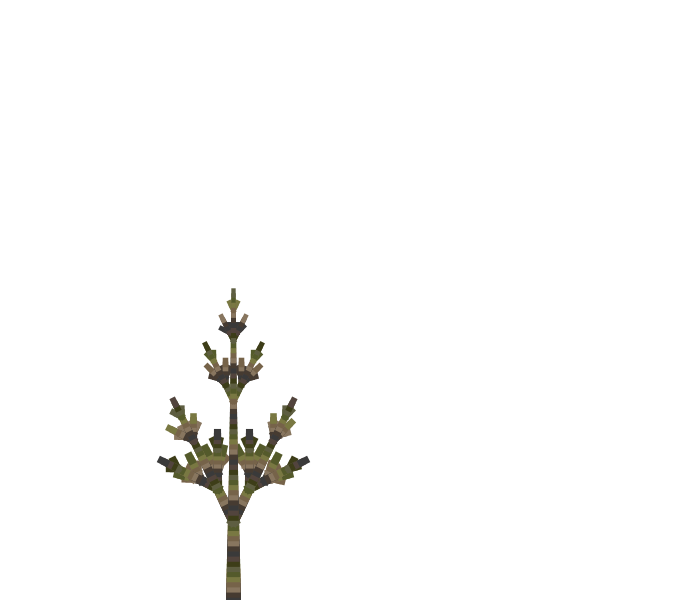

In [14]:
val tree = plant {
    seed = "X"
    rules = mapOf(
        "X" to "F[+X][-X]FX",
        "F" to "FF"
    )
    sprout(5, listOf(1.0, 0.9))
}

canvas(700, 600) { width, height ->
    goSquirrel(
        startX = width / 3,
        startY = height,
        angleChangeDeg = 25.0,
        startStroke = 15.0f,
        strokeChange = 0.98f,
        length = 5,
        bluePrint = tree.bluePrint,
        penColors = treeShades
    )
}


## Seedlings to Forest


In [15]:
show("seedlings.jpg")

In [16]:
import net.maiatoday.forestwalk.lsystem.Plant
import kotlin.random.Random

// read dataframe of collected trees
%use dataframe
val plants = DataFrame.readCSV("nursery.csv")
plants

seed,rules,bluePrint,iterations,isTree,ground
X,"{X=F[+X][-X]FX, F=FF}",FFFFFFFFFFFFFFFF[+FFFFFFFF[+FFFF[+FFF...,5,true,Back
X,"{X=F[+X][-X]FX, F=FF}",FFFFFFFFFFFFFFFF[+FFFFFFFF[+FFFF[+FF[...,5,true,Fore
X,"{X=F[+X][-X]FX, F=FF}",FFFFFFFFFFFFFFFF[+FFFFFFFF[+FFFF[+FF[...,5,true,Middle
X,"{X=F[+X][-X]FX, F=FF}",FFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFF[+FFF...,5,true,Middle
X,"{X=F[+X][-X]FX, F=FF}",FFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFF[+FFF...,5,true,Middle
X,"{X=F[+X][-X]FX, F=FF}",FFFFFFFFFFFFFFFF[+FFFFFFFF[+FFFFFFFF[...,5,true,Fore
X,"{X=F[+X][-X]FX, F=FF}",FFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFF[+FFF...,5,true,Back
X,"{X=F[+X][-X]FX, F=FF}",FFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFF[+FFF...,5,true,Middle
X,"{X=F[+X][-X]FX, F=FF}",FFFFFFFFFFFFFFFF[+FFFFFFFF[+FFFFFFFF[...,5,true,Middle
X,"{X=F[+X][-X]FX, F=FF}",FFFFFFFFFFFFFFFF[+FFFFFFFF[+FFFF[+FF[...,5,true,Middle


In [17]:
import net.maiatoday.forestwalk.lsystem.*
val width = 1000
val height = 800
val seedlings = plants
    .add("startX") {
        xSeedling(isTree, Ground.valueOf(ground), width)
    }
    .add("startY") {
        ySeedling(isTree, Ground.valueOf(ground), height)
    }
    .add("colors") {
        colorSeedling(isTree, Ground.valueOf(ground))
    }
    .add("length") {
        lengthSeedling(isTree, Ground.valueOf(ground))
    }
    .add("startStroke") {
        startStrokeSeedling(isTree, Ground.valueOf(ground))
    }
    .add("strokeChange") {
        strokeChangeSeedling(isTree, Ground.valueOf(ground))
    }
    .add("angleChangeDeg") {
        25.0
    }
    // strip out unecessary columns
    .remove { seed and rules and iterations }
seedlings

bluePrint,isTree,ground,startX,startY,colors,length,startStroke,strokeChange,angleChangeDeg
FFFFFFFFFFFFFFFF[+FFFFFFFF[+FFFF[+FFF...,true,Back,64,636,"[java.awt.Color[r=192,g=192,b=192]]",3,8.000000,0.980000,25.000000
FFFFFFFFFFFFFFFF[+FFFFFFFF[+FFFF[+FF[...,true,Fore,470,785,"[java.awt.Color[r=61,g=61,b=24]]",5,16.000000,0.980000,25.000000
FFFFFFFFFFFFFFFF[+FFFFFFFF[+FFFF[+FF[...,true,Middle,444,704,"[java.awt.Color[r=128,g=128,b=128]]",4,10.000000,0.980000,25.000000
FFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFF[+FFF...,true,Middle,748,706,"[java.awt.Color[r=128,g=128,b=128]]",4,10.000000,0.980000,25.000000
FFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFF[+FFF...,true,Middle,6,737,"[java.awt.Color[r=128,g=128,b=128]]",4,10.000000,0.980000,25.000000
FFFFFFFFFFFFFFFF[+FFFFFFFF[+FFFFFFFF[...,true,Fore,184,799,"[java.awt.Color[r=58,g=58,b=58]]",5,16.000000,0.980000,25.000000
FFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFF[+FFF...,true,Back,439,639,"[java.awt.Color[r=192,g=192,b=192]]",3,8.000000,0.980000,25.000000
FFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFF[+FFF...,true,Middle,872,718,"[java.awt.Color[r=128,g=128,b=128]]",4,10.000000,0.980000,25.000000
FFFFFFFFFFFFFFFF[+FFFFFFFF[+FFFFFFFF[...,true,Middle,33,735,"[java.awt.Color[r=128,g=128,b=128]]",4,10.000000,0.980000,25.000000
FFFFFFFFFFFFFFFF[+FFFFFFFF[+FFFF[+FF[...,true,Middle,421,722,"[java.awt.Color[r=128,g=128,b=128]]",4,10.000000,0.980000,25.000000


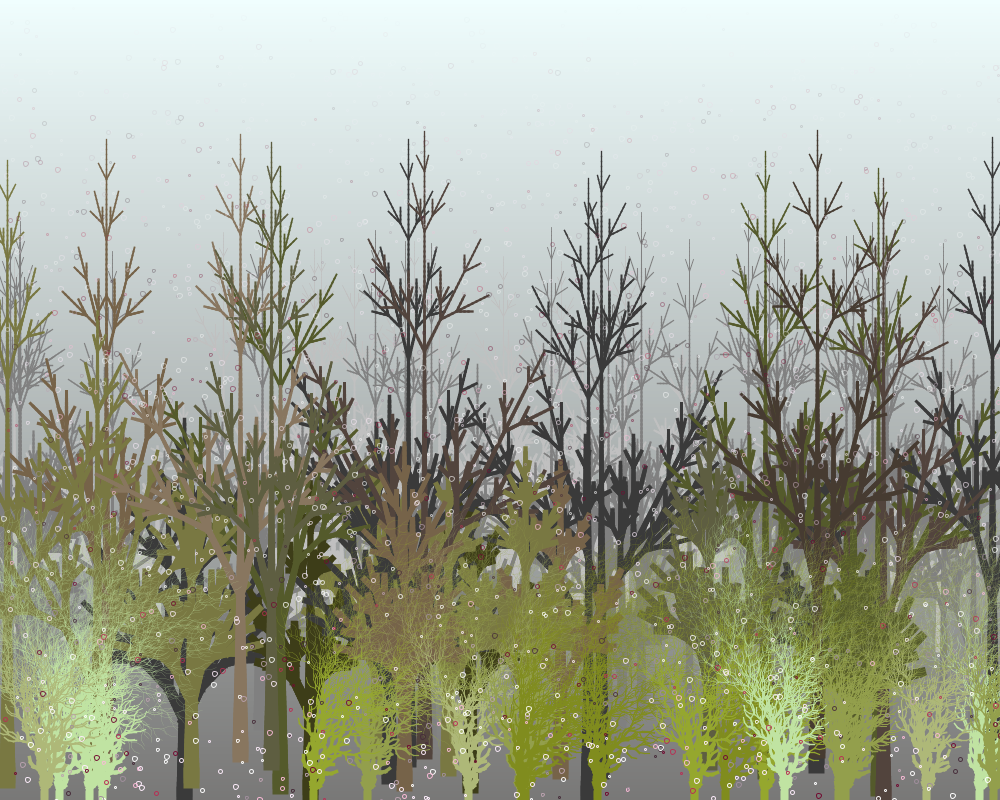

In [22]:
// loop through dataframe and draw
val forestForeground = seedlings.filter { !isTree || Ground.valueOf(ground) == Ground.Fore }.toListOf<Seedling>()
val forestMiddleground = seedlings.filter { isTree && Ground.valueOf(ground) == Ground.Middle }.toListOf<Seedling>()
val forestBackground = seedlings.filter { isTree && Ground.valueOf(ground) == Ground.Back }.toListOf<Seedling>()

val forestImage = canvas(width, height) { width, height ->
    skyEarth(width, height, springSky, springEarth)
    for (plant in forestBackground) {
        goSquirrel(plant)
    }
    for (plant in forestMiddleground) {
        goSquirrel(plant)
    }
    for (plant in forestForeground) {
        goSquirrel(plant)
    }
}
val forestId = "forestid"
DISPLAY(forestImage, id = forestId)
repeat (20) {
    Thread.sleep(500)
    val c = canvas(width, height, startImage = forestImage) { width, height ->
        repeat(2000) {
            val p = randomOffset(width = width, height = height, startY = 0)
            val radius = randomRadius(2, 6)
            color = randomFrom(petalShades, ((p.y / height.toFloat()) * 255).toInt())
            drawOval(p.x, p.y, radius, radius)
        }
    }
    UPDATE_DISPLAY(c, forestId)
}


## Share

In [19]:
show("ForestWalkShare.jpg")

# All The Links

> There are two kinds of people: those who know nothing about fractals and those who
> think that there are two kinds of people: those who know nothing about fractals and
> those who think that there are two kinds people. . . .

[from Math Jokes](https://arxiv.org/pdf/2403.01010.pdf)

## Fractals
[Mandelbrot on wikipedia](https://en.wikipedia.org/wiki/Benoit_Mandelbrot)

[Mandlebrot explorer](https://mandelbrot.site)

[Mandelbrot how does it work](http://warp.povusers.org/Mandelbrot/)

## L-systems

[Lindenmayer on wikipedia](https://en.wikipedia.org/wiki/Aristid_Lindenmayer)

[The algorythmic beauty of plants](http://algorithmicbotany.org/papers/#abop)

[More formulas](https://observablehq.com/@kelleyvanevert/l-systems-2)

[L-System playground](https://dmitrykandalov.com/lsystem/)

## Notebooks and DataFrames

[Info on DataFrames](https://kotlin.github.io/dataframe/createdataframe.html#todataframe)

[Info on Kotlin Notebooks](https://blog.jetbrains.com/kotlin/2023/07/introducing-kotlin-notebook/)

[Video on Kotlin Notebooks](https://www.youtube.com/watch?v=_RYV7ZvMKpE)
